In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("./archive/2020-2025.csv")
df_raw  = pd.read_csv("./archive/2020-2025.csv")


In [17]:
df.describe()

,2020,2021,2022,2023,2024,2025
count,172.000000,171.000000,172.000000,172.000000,170.000000,167.000000
mean,80085.953488,95792.526316,106295.313953,108855.877907,113836.435294,116589.826347
std,119271.527295,143259.272296,158380.160279,158045.949188,163538.921386,169066.710541
min,52.000000,62.000000,61.000000,63.000000,65.000000,65.000000
25%,7220.500000,8636.000000,9516.750000,10604.250000,10810.500000,10648.500000
50%,23519.000000,26113.000000,28930.000000,31115.000000,33619.000000,35309.000000
75%,77944.750000,91838.000000,114043.000000,111798.500000,120958.250000,124099.500000
max,500462.000000,598892.000000,632318.000000,645511.000000,664965.000000,684864.000000


In [18]:
df.isnull().sum()

Country     0
2020       24
2021       25
2022       24
2023       24
2024       26
2025       29
dtype: int64

In [21]:
df_raw = df.copy()
df_raw.isnull().sum()

Country    0
2020       0
2021       2
2022       2
2023       2
2024       4
2025       7
dtype: int64

In [ ]:
# handling outliers
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.mask((series < lower_bound) | (series > upper_bound))

# Apply outlier detection column-wise (ignores Country column)
for col in df.columns[1:]:
    df[col] = detect_outliers(df[col])

In [11]:
df

,Country,2020,2021,2022,2023,2024,2025
0,Afghanistan,20136.0,14278.0,14501.0,17248.0,NaN,NaN
1,Albania,15271.0,18086.0,19185.0,23388.0,27259.0,28372.0
2,Algeria,164774.0,185850.0,225709.0,247789.0,264913.0,268885.0
3,Andorra,2885.0,3325.0,3376.0,3786.0,4038.0,4035.0
4,Angola,66521.0,84375.0,142442.0,109764.0,115946.0,113343.0
...,...,...,...,...,...,...,...
191,Vietnam,346310.0,370076.0,411068.0,433008.0,459472.0,490970.0
192,Palestine,15532.0,18109.0,19166.0,17848.0,NaN,NaN
193,Yemen,20220.0,19394.0,23534.0,19412.0,19101.0,17401.0
194,Zambia,18138.0,22096.0,29164.0,27578.0,26326.0,28910.0


In [12]:
df.isnull().sum()

Country     0
2020       24
2021       25
2022       24
2023       24
2024       26
2025       29
dtype: int64

In [13]:
df.describe()

,2020,2021,2022,2023,2024,2025
count,172.000000,171.000000,172.000000,172.000000,170.000000,167.000000
mean,80085.953488,95792.526316,106295.313953,108855.877907,113836.435294,116589.826347
std,119271.527295,143259.272296,158380.160279,158045.949188,163538.921386,169066.710541
min,52.000000,62.000000,61.000000,63.000000,65.000000,65.000000
25%,7220.500000,8636.000000,9516.750000,10604.250000,10810.500000,10648.500000
50%,23519.000000,26113.000000,28930.000000,31115.000000,33619.000000,35309.000000
75%,77944.750000,91838.000000,114043.000000,111798.500000,120958.250000,124099.500000
max,500462.000000,598892.000000,632318.000000,645511.000000,664965.000000,684864.000000


In [27]:
df = df.fillna(df.median(numeric_only=True))


In [28]:
df.isnull().sum()

Country    0
2020       0
2021       0
2022       0
2023       0
2024       0
2025       0
dtype: int64

In [50]:
pakistan = df[df["Country"] == "Pakistan"].iloc[0, 1:]

In [49]:
pakistan

,Country,2020,2021,2022,2023,2024,2025
131,Pakistan,300410,348481.0,374850.0,337754.0,373078.0,47829.0


In [51]:
pakistan

2020      300410
2021    348481.0
2022    374850.0
2023    337754.0
2024    373078.0
2025     47829.0
Name: 131, dtype: object

2020      300410
2021    348481.0
2022    374850.0
2023    337754.0
2024    373078.0
2025     47829.0
Name: 131, dtype: object


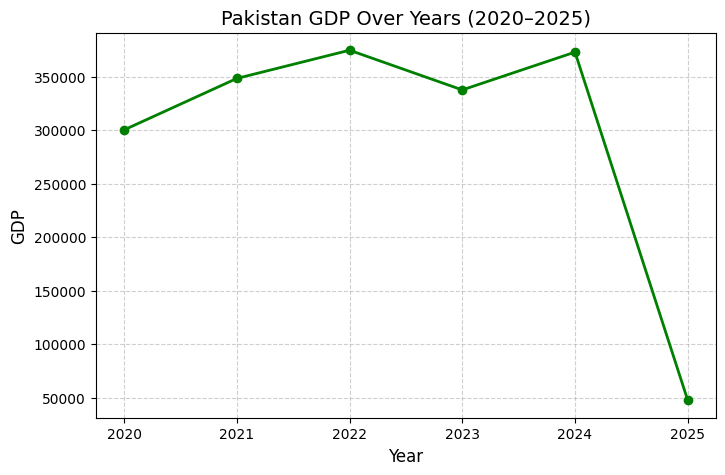

In [60]:
years = pakistan.index.astype(int)   # convert column names to integers (2020,2021,...)
values = pakistan.values

print(pakistan)

plt.figure(figsize=(8,5))
plt.plot(years, values, marker='o', linewidth=2, color='green')

# Labels and title
plt.title("Pakistan GDP Over Years (2020–2025)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("GDP", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# plt.show()

In [ ]:
for year in df.columns[1:]:  
    print(f"\nTop 5 countries in {year}:")
    top5 = df[['Country', year]].nlargest(5, year)  
    print(top5)


Top 5 countries in 2020:
            Country      2020
186   United States  21354125
36            China  15103357
85            Japan   5054069
64          Germany   3936989
185  United Kingdom   2698705

Top 5 countries in 2021:
           Country        2021
186  United States  23681175.0
36           China  18190803.0
85           Japan   5039148.0
64         Germany   4351188.0
77           India   3167271.0

Top 5 countries in 2022:
           Country        2022
186  United States  26006900.0
36           China  18307816.0
85           Japan   4262146.0
64         Germany   4166872.0
77           India   3346107.0

Top 5 countries in 2023:
           Country        2023
186  United States  27720725.0
36           China  18270351.0
64         Germany   4527009.0
85           Japan   4213167.0
77           India   3638490.0

Top 5 countries in 2024:
           Country        2024
186  United States  29184900.0
36           China  18748009.0
64         Germany   4658526.0
85      

In [66]:
for year in df.columns[1:]:  
    print(f"\nTop 5 smallest gdp countries in {year}: \n")
    top5 = df[['Country', year]].nsmallest(5, year)  
    print(top5)


Top 5 smallest gdp countries in 2020: 

              Country  2020
181            Tuvalu    52
121             Nauru   125
89           Kiribati   222
109  Marshall Islands   242
132             Palau   259

Top 5 smallest gdp countries in 2021: 

              Country   2021
181            Tuvalu   62.0
121             Nauru  176.0
132             Palau  236.0
109  Marshall Islands  259.0
89           Kiribati  285.0

Top 5 smallest gdp countries in 2022: 

              Country   2022
181            Tuvalu   61.0
121             Nauru  152.0
132             Palau  248.0
109  Marshall Islands  253.0
89           Kiribati  271.0

Top 5 smallest gdp countries in 2023: 

              Country   2023
181            Tuvalu   63.0
121             Nauru  152.0
109  Marshall Islands  259.0
132             Palau  275.0
89           Kiribati  289.0

Top 5 smallest gdp countries in 2024: 

              Country   2024
181            Tuvalu   65.0
121             Nauru  161.0
109  Marshall Isla

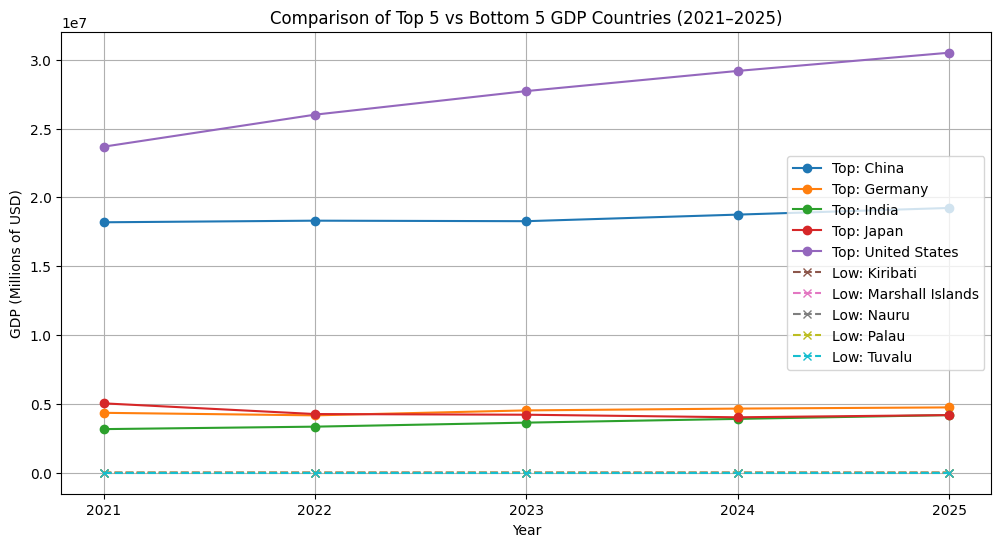

In [72]:

# Select last 5 years only
years = ["2021", "2022", "2023", "2024", "2025"]

# ---- Top 5 largest GDP countries ----
top5 = df[["Country"] + years].set_index("Country").mean(axis=1).nlargest(5).index
top5_data = df[df["Country"].isin(top5)].set_index("Country")[years].T

# ---- Bottom 5 lowest GDP countries ----
bottom5 = df[["Country"] + years].set_index("Country").mean(axis=1).nsmallest(5).index
bottom5_data = df[df["Country"].isin(bottom5)].set_index("Country")[years].T

# ---- Plot both ----
plt.figure(figsize=(12, 6))

# Top 5 plot (in millions)
for country in top5_data.columns:
    plt.plot(top5_data.index, top5_data[country], marker="o", label=f"Top: {country}")

# Bottom 5 plot (in millions)
for country in bottom5_data.columns:
    plt.plot(bottom5_data.index, bottom5_data[country], marker="x", linestyle="--", label=f"Low: {country}")

plt.title("Comparison of Top 5 vs Bottom 5 GDP Countries (2021–2025)")
plt.xlabel("Year")
plt.ylabel("GDP (Millions of USD)")  # updated label
plt.legend()
plt.grid(True)
plt.show()


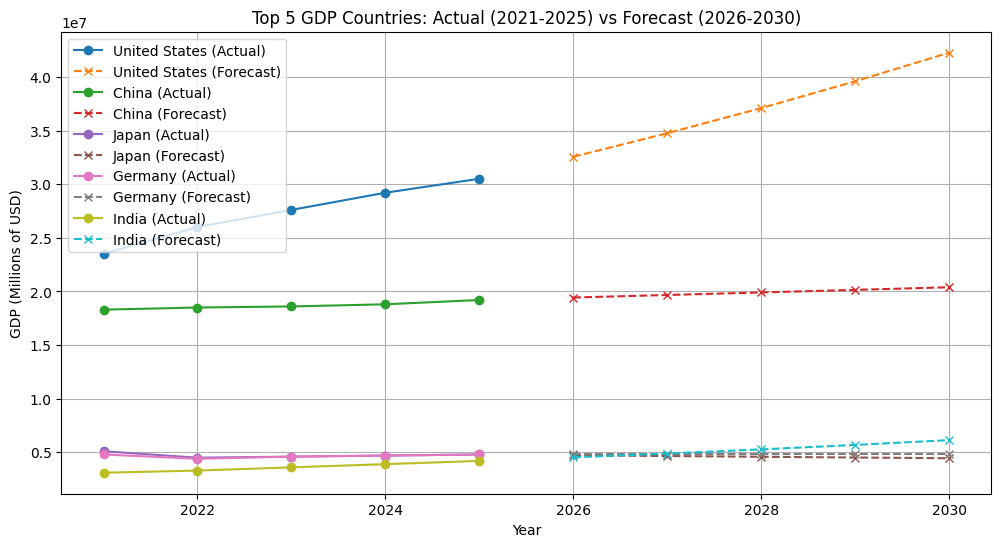

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Example GDP Data (replace with your df of top 5 GDP countries)
data = {
    'Country': ['United States', 'China', 'Japan', 'Germany', 'India'],
    '2021': [23_500_000, 18_300_000, 5_100_000, 4_800_000, 3_100_000],
    '2022': [26_000_000, 18_500_000, 4_500_000, 4_400_000, 3_300_000],
    '2023': [27_600_000, 18_600_000, 4_600_000, 4_600_000, 3_600_000],
    '2024': [29_200_000, 18_800_000, 4_700_000, 4_700_000, 3_900_000],
    '2025': [30_500_000, 19_200_000, 4_800_000, 4_800_000, 4_200_000],
}
df = pd.DataFrame(data)

# Years
years = list(map(int, df.columns[1:]))

# Forecast next 5 years
future_years = list(range(2026, 2031))

forecast_df = pd.DataFrame({'Country': df['Country']})

for idx, row in df.iterrows():
    gdp_values = row[1:].values.astype(float)
    first, last = gdp_values[0], gdp_values[-1]
    n = len(years)
    
    # CAGR
    cagr = (last / first) ** (1/(n-1)) - 1
    
    # Forecast for next 5 years
    forecasts = [last * (1 + cagr) ** t for t in range(1, 6)]
    forecast_df.loc[idx, future_years] = forecasts

# Combine actual + forecast
combined_df = pd.concat([df.set_index('Country'), forecast_df.set_index('Country')], axis=1)

# Plot
plt.figure(figsize=(12,6))
for country in combined_df.index:
    plt.plot(years, df.set_index('Country').loc[country], marker='o', label=f"{country} (Actual)")
    plt.plot(future_years, forecast_df.set_index('Country').loc[country], marker='x', linestyle='--', label=f"{country} (Forecast)")

plt.title("Top 5 GDP Countries: Actual (2021-2025) vs Forecast (2026-2030)")
plt.xlabel("Year")
plt.ylabel("GDP (Millions of USD)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:


# Select latest year (2025 for example)
year = "2025"

# Drop missing values for that year
gdp_data = df[["Country", year]].dropna()

# Compute world GDP
world_gdp = gdp_data[year].sum()

# Compute share (%) for each country
gdp_data["Share"] = (gdp_data[year] / world_gdp) * 100

# ---- Top 5 countries ----
top5 = gdp_data.nlargest(5, year)

# ---- Bottom 50 countries ----
bottom50 = gdp_data.nsmallest(50, year)

# Print insights
print("Top 5 Countries' Share of Global GDP:")
print(top5[["Country", "Share"]])

print("\nBottom 50 Countries Combined Share of Global GDP:")
print(bottom50["Share"].sum(), "%")





Top 5 Countries' Share of Global GDP:
         Country      Share
0  United States  48.031496
1          China  30.236220
2          Japan   7.559055
3        Germany   7.559055
4          India   6.614173

Bottom 50 Countries Combined Share of Global GDP:
100.0 %
